In [4]:
%matplotlib inline
from pymc3 import Model, Normal, invlogit, Binomial, sample, forestplot
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Data
n = np.ones(4)*5
y = np.array([0, 1, 3, 5])
dose = np.array([-.86,-.3,-.05,.73])

with Model() as bioassay_model:

    # Prior distributions for latent variables
    alpha = Normal('alpha', 0, sd=100)
    beta = Normal('beta', 0, sd=100)

    # Linear combinations of parameters
    theta = invlogit(alpha + beta*dose)

    # Model likelihood
    deaths = Binomial('deaths', n=n, p=theta, observed=y)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta, alpha]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:00<00:00, 3008.58draws/s]
/Users/hstrey/anaconda3/lib/python3.6/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)
The number of effective samples is smaller than 25% for some parameters.


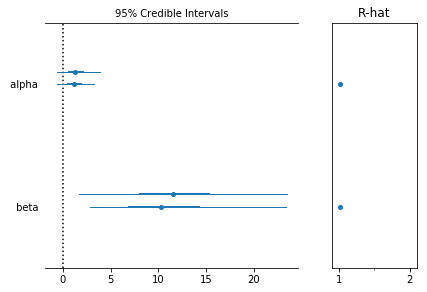

In [3]:
with bioassay_model:

    # Draw wamples
    trace = sample(1000, njobs=2)
    # Plot two parameters
    forestplot(trace, varnames=['alpha', 'beta'])

/Users/hstrey/anaconda3/lib/python3.6/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alpha,1.338523,1.108954,0.042120,-0.669171,3.516740,493.399034,1.004815
beta,11.830699,5.941827,0.242148,2.172367,23.166904,451.928821,1.007515


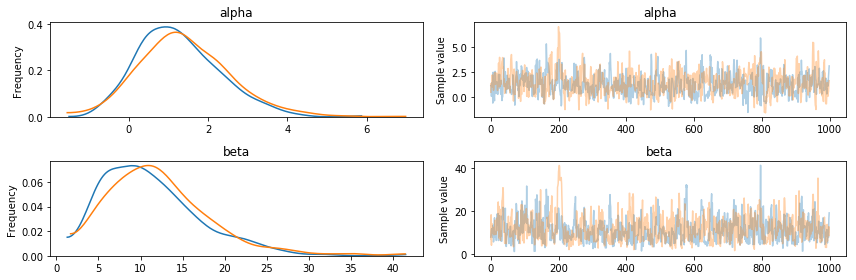

In [5]:
pm.traceplot(trace)
pm.summary(trace)

In [7]:
ld50 = -trace['alpha']/trace['beta']
ld50.shape

(2000,)

(array([0.02888556, 0.        , 0.        , 0.        , 0.01444278,
        0.10109947, 0.10109947, 0.31774119, 0.67881073, 1.25652199,
        2.83078516, 4.11619271, 5.02608794, 5.45937139, 3.87066543,
        2.26751669, 1.06876583, 0.67881073, 0.3899551 , 0.31774119,
        0.12998503, 0.12998503, 0.02888556, 0.01444278, 0.01444278,
        0.        , 0.        , 0.        , 0.02888556, 0.01444278]),
 array([-0.56060176, -0.52598239, -0.49136302, -0.45674365, -0.42212428,
        -0.38750491, -0.35288554, -0.31826617, -0.2836468 , -0.24902743,
        -0.21440806, -0.17978869, -0.14516932, -0.11054995, -0.07593058,
        -0.04131121, -0.00669184,  0.02792753,  0.0625469 ,  0.09716627,
         0.13178564,  0.16640501,  0.20102438,  0.23564375,  0.27026312,
         0.30488249,  0.33950186,  0.37412124,  0.40874061,  0.44335998,
         0.47797935]),
 <a list of 30 Patch objects>)

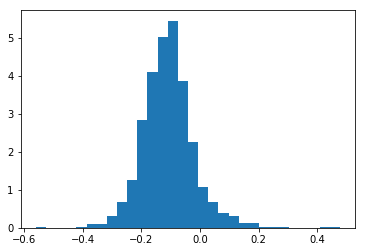

In [8]:
plt.hist(ld50,bins=30,density=True)

In [9]:
print(np.percentile(ld50,(2.5,25,50,75,97.5)))

[-0.27111114 -0.16152486 -0.110964   -0.0612286   0.08928662]
